In [1]:
import geopandas as gpd
import shapely as shp
import pandas as pd

In [2]:
# load input coordinates from a geodataframe (file) folder
folder_path = "data/voronoi_gdf"
voronoi_gdf = gpd.read_file(folder_path)
sportsfields = gpd.read_file("data/sportfields.json")

# sportsfield_centers_gdf = gpd.read_file("data/sportsfield_centers_gdf", bbox=None, mask=None, rows=None, engine=None)
shelter_locations_polygon = gpd.GeoDataFrame(sportsfields, geometry = sportsfields['geometry'])
shelter_locations_polygon = shelter_locations_polygon.to_crs(epsg=4326)
shelter_locations_polygon['geometry']

0    POLYGON ((36.12372 36.19336, 36.12435 36.19388...
1    POLYGON ((36.14870 36.18738, 36.14892 36.18758...
2    POLYGON ((36.15093 36.18793, 36.15134 36.18830...
3    POLYGON ((36.14769 36.18451, 36.14826 36.18494...
4    POLYGON ((36.15318 36.20267, 36.15350 36.20265...
5    POLYGON ((36.13532 36.17255, 36.13577 36.17269...
Name: geometry, dtype: geometry

In [5]:
# load input coordinates from a geodataframe (file) folder
# folder_path = "data/voronoi_gdf"
# voronoi_gdf = gpd.read_file(folder_path)
sportsfields = gpd.read_file("data/sportfields.json")

# sportsfield_centers_gdf = gpd.read_file("data/sportsfield_centers_gdf", bbox=None, mask=None, rows=None, engine=None)
shelter_locations_polygon = gpd.GeoDataFrame(sportsfields, geometry = sportsfields['geometry'])
shelter_locations_polygon = shelter_locations_polygon.to_crs(epsg=4326)

shelter_locations = shelter_locations_polygon
shelter_locations['geometry'] = shelter_locations_polygon['geometry'].centroid

coords = shelter_locations_polygon['geometry'].centroid
coords = shp.get_coordinates(coords)
coords = coords.tolist()

longitude = coords[2][1]
print(longitude)

36.188028064986135


C:\Users\maart\AppData\Local\Temp\ipykernel_15088\3310634233.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shelter_locations['geometry'] = shelter_locations_polygon['geometry'].centroid
C:\Users\maart\AppData\Local\Temp\ipykernel_15088\3310634233.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  coords = shelter_locations_polygon['geometry'].centroid


In [5]:
shelter_locations = shelter_locations_polygon
shelter_locations['geometry'] = shelter_locations_polygon['geometry'].centroid

coords = shelter_locations['geometry']
coords = shp.get_coordinates(coords)
coords = coords.tolist()

C:\Users\maart\AppData\Local\Temp\ipykernel_17844\2273988973.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shelter_locations['geometry'] = shelter_locations_polygon['geometry'].centroid


In [6]:
from shelter import PopulationMapGenerator as pmg

In [7]:
# main_df_total = pd.DataFrame()
pop_file = 'data/population_tur_2020.csv'
map_generator = pmg(pop_file)
data = map_generator.filter_data()
# amount of persons for which each shelter is the closest (based on voronoi)
population_gdf = map_generator.get_population_geo_df()

merged_data = gpd.sjoin(voronoi_gdf, population_gdf, how='inner', predicate='intersects')

'''The generation of population data per location'''
population_sum = merged_data.groupby('geometry')['population_2020'].sum().reset_index()

shelter_locations['population_2020'] = population_sum["population_2020"]

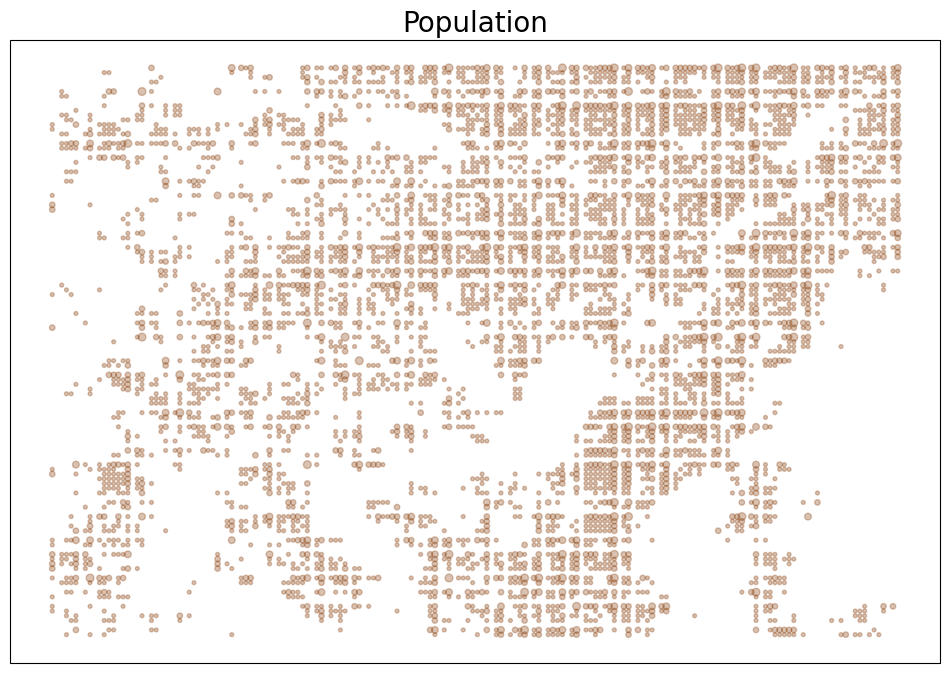

In [8]:
output_file = 'pictures/population_map.png'

# map_generator = PopulationMapGenerator(pop_file)
map_generator.filter_data()
map_generator.generate_population_map(output_file)

In [9]:
shelter_locations

,element_type,osmid,area,geometry,population_2020
0,way,368724372,10693.517768,POINT (36.12451 36.19324),9234.159911
1,way,486082934,1429.519044,POINT (36.14900 36.18735),5615.685033
2,way,639485270,1784.938237,POINT (36.15126 36.18803),15680.057800
3,way,1139283634,2815.458705,POINT (36.14811 36.18460),11098.222728
4,way,1140722732,1493.723530,POINT (36.15333 36.20245),7706.881553
5,way,1145595129,1039.152059,POINT (36.13559 36.17253),5639.181624


In [10]:
from shelter import WeatherData as wd

In [11]:
df_weather = pd.DataFrame()

for coord in coords: 
    # df = pd.DataFrame({'lon': [coord[0]], 'lat': [coord[1]], 'geometry': [coord]})

    '''The generation of meteorological data per location'''

    #retrieve weather data and append it location-specific
    weather_data, weather_var = wd.get_weather_API(coord)
    df_coord = wd.get_weather_data(coord, weather_data, weather_var)

    # shelter_locations = shelter_locations.merge(df_coord, how='inner')
    # print(df)
    df_weather = pd.concat([df_weather, df_coord], axis=0)


In [12]:
df_weather

,temperature_2m_max,temperature_2m_min,rain_sum,snowfall_sum,windspeed_10m_max,winddirection_10m_dominant,max_temp,min_temp,max_windspeed
0,21.609305,13.126382,1.735140,0.022682,15.850192,195.051450,34,0,25
0,21.264641,12.462890,2.111166,0.018736,17.263492,184.599343,32,0,27
0,21.113355,12.313246,2.111166,0.018736,17.263492,184.599343,32,-1,27
0,21.264641,12.462890,2.111166,0.018736,17.263492,184.599343,32,0,27
0,20.964641,12.162890,2.111166,0.018736,17.263492,184.599343,32,-2,27
0,19.868144,12.565079,3.541270,0.013142,16.291954,187.076628,31,0,27


In [13]:
df_weather.reset_index(drop=True, inplace = True)
# df_weather = df_weather.drop(['level_0', 'index'], axis=1)
# shelter_locations = pd.concat([shelter_locations, df_weather], axis=0)

shelter_locations = shelter_locations.join(df_weather) 

In [14]:
shelter_locations

,element_type,osmid,area,geometry,population_2020,temperature_2m_max,temperature_2m_min,rain_sum,snowfall_sum,windspeed_10m_max,winddirection_10m_dominant,max_temp,min_temp,max_windspeed
0,way,368724372,10693.517768,POINT (36.12451 36.19324),9234.159911,21.609305,13.126382,1.735140,0.022682,15.850192,195.051450,34,0,25
1,way,486082934,1429.519044,POINT (36.14900 36.18735),5615.685033,21.264641,12.462890,2.111166,0.018736,17.263492,184.599343,32,0,27
2,way,639485270,1784.938237,POINT (36.15126 36.18803),15680.057800,21.113355,12.313246,2.111166,0.018736,17.263492,184.599343,32,-1,27
3,way,1139283634,2815.458705,POINT (36.14811 36.18460),11098.222728,21.264641,12.462890,2.111166,0.018736,17.263492,184.599343,32,0,27
4,way,1140722732,1493.723530,POINT (36.15333 36.20245),7706.881553,20.964641,12.162890,2.111166,0.018736,17.263492,184.599343,32,-2,27
5,way,1145595129,1039.152059,POINT (36.13559 36.17253),5639.181624,19.868144,12.565079,3.541270,0.013142,16.291954,187.076628,31,0,27


In [15]:
'''The generation of elevation data per location'''
from shelter import SlopeFunctions as sf

In [16]:
shelter_locations_polygon = gpd.GeoDataFrame(sportsfields, geometry = sportsfields['geometry'])
shelter_locations_polygon = shelter_locations_polygon.to_crs(epsg=4326)
shelter_locations_polygon['geometry']

0    POLYGON ((36.12372 36.19336, 36.12435 36.19388...
1    POLYGON ((36.14870 36.18738, 36.14892 36.18758...
2    POLYGON ((36.15093 36.18793, 36.15134 36.18830...
3    POLYGON ((36.14769 36.18451, 36.14826 36.18494...
4    POLYGON ((36.15318 36.20267, 36.15350 36.20265...
5    POLYGON ((36.13532 36.17255, 36.13577 36.17269...
Name: geometry, dtype: geometry

In [17]:

polygon_coords = []

for polygon in shelter_locations_polygon['geometry']:
    if isinstance(polygon, shp.geometry.base.BaseGeometry):
        coords = (list(polygon.exterior.coords))
        polygon_coords.append(coords)


slopes = []
dem_file = 'data/n36_e036_1arc_v3.tif'

for coords in polygon_coords: 
    max_slope = sf.find_maximum_slope_among_points(coords, dem_file)
    slopes.append(max_slope)
    
shelter_locations['slopes'] = slopes

c:\Users\maart\Documents\2 BUILDING TECHNOLOGY\CORE\SHELTER\shelter.py:64: RuntimeWarning: invalid value encountered in true_divide
  slope_radians = math.atan(delta_elevation / distance)


In [18]:
shelter_locations

,element_type,osmid,area,geometry,population_2020,temperature_2m_max,temperature_2m_min,rain_sum,snowfall_sum,windspeed_10m_max,winddirection_10m_dominant,max_temp,min_temp,max_windspeed,slopes
0,way,368724372,10693.517768,POINT (36.12451 36.19324),9234.159911,21.609305,13.126382,1.735140,0.022682,15.850192,195.051450,34,0,25,7.190185
1,way,486082934,1429.519044,POINT (36.14900 36.18735),5615.685033,21.264641,12.462890,2.111166,0.018736,17.263492,184.599343,32,0,27,1.865136
2,way,639485270,1784.938237,POINT (36.15126 36.18803),15680.057800,21.113355,12.313246,2.111166,0.018736,17.263492,184.599343,32,-1,27,12.566270
3,way,1139283634,2815.458705,POINT (36.14811 36.18460),11098.222728,21.264641,12.462890,2.111166,0.018736,17.263492,184.599343,32,0,27,3.019149
4,way,1140722732,1493.723530,POINT (36.15333 36.20245),7706.881553,20.964641,12.162890,2.111166,0.018736,17.263492,184.599343,32,-2,27,1.477266
5,way,1145595129,1039.152059,POINT (36.13559 36.17253),5639.181624,19.868144,12.565079,3.541270,0.013142,16.291954,187.076628,31,0,27,40.726500


In [19]:
shelter_locations.to_csv('data/location_information_long.csv')